In [908]:
import sys, os
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt
from tqdm import *

from simulation.units import *
from simulation.population_sim import LensingObservationWithSubhalos, SubhaloPopulation

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [909]:
alpha = SubhaloPopulation._alpha_calib(1e8 * M_s, 1e10 * M_s, 150, M_MW, -1.9) # alpha for conventional n_calib
f_sub = SubhaloPopulation._m_in_sub(1e13 * M_s, alpha, -1.9, 1e7 * M_s, 0.01 * 1e13 * M_s) / (1e13 * M_s) # corresponding f_sub
print("Sensible value for f_sub is", f_sub)

Sensible value for f_sub is 0.14976091493949886


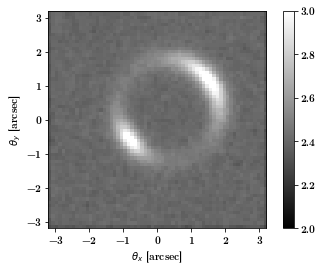

In [910]:
# Generate single lensing sample
# Fix source parameters and consider only spherical hosts
lo = LensingObservationWithSubhalos(#sim_mvgauss_mean=sim_mvgauss['mean'], sim_mvgauss_cov=sim_mvgauss['cov'],
                                    M_200_sigma_v_scatter=False,   
                                    m_200_min_sub=1e7 * M_s, m_200_max_sub_div_M_hst=0.01,
                                    beta=-1.9, f_sub=0.15
)

v_min = 2.
v_max = 3.

plt.imshow(np.log10(lo.image_poiss_psf),
        vmin=v_min,
        vmax=v_max,
        cmap='gist_gray',
        extent=(-lo.coordinate_limit, lo.coordinate_limit,-lo.coordinate_limit, lo.coordinate_limit),
        origin="lower"
)
plt.colorbar()

plt.xlabel(r"$\theta_x$ [arcsec]")
plt.ylabel(r"$\theta_y$ [arcsec]")

In [913]:
# Generate single lensing sample
# Fix source parameters and consider only spherical hosts
n_mc = 500

f_sub_realiz_list = []
for i_mc in tqdm_notebook(range(n_mc)):
    lo = LensingObservationWithSubhalos(#sim_mvgauss_mean=sim_mvgauss['mean'], sim_mvgauss_cov=sim_mvgauss['cov'],
                                        M_200_sigma_v_scatter=False,   
                                        m_200_min_sub=1e7 * M_s, m_200_max_sub_div_M_hst=0.01,
                                        beta=-1.9, f_sub=0.15
    )

    f_sub_realiz_list.append(lo.f_sub_realiz)

(array([ 338.,  107.,   36.,    7.,    3.,    7.,    1.,    0.,    0.,    1.]),
 array([ 0.02314652,  0.13455961,  0.24597271,  0.3573858 ,  0.46879889,
         0.58021199,  0.69162508,  0.80303817,  0.91445127,  1.02586436,
         1.13727745]),
 <a list of 10 Patch objects>)

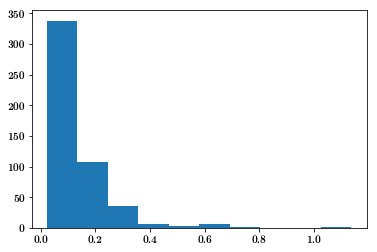

In [914]:
plt.hist((f_sub_realiz_list))

In [915]:
# Does mean value roughly match f_sub parameter?
np.mean(f_sub_realiz_list)

0.13797242438417329

In [916]:
# n_mc = 20

# f, ax = plt.subplots(int(n_mc / 5), 5,figsize=(15,15))

# v_min = 2.
# v_max = 3.

# for i_mc in range(n_mc):
    
#     i_x, i_y = divmod(i_mc, 5)

#     # Fix source parameters and consider only spherical hosts

#     lo = LensingObservationWithSubhalos(sim_mvgauss_mean=sim_mvgauss['mean'], sim_mvgauss_cov=sim_mvgauss['cov'], 
#                                        spherical_host=1,
#                                        fix_source=1)

#     ax[i_x, i_y].imshow(np.log10(lo.image_poiss_psf),
#             vmin=v_min,
#             vmax=v_max,
#             cmap='gist_gray',
#             extent=(-lo.coordinate_limit, lo.coordinate_limit,-lo.coordinate_limit, lo.coordinate_limit),
#             origin="lower"
#     )
    
#     ax[i_x, i_y].set_xlabel(r"$\theta_x$ [arcsec]")
#     ax[i_x, i_y].set_ylabel(r"$\theta_y$ [arcsec]")

# plt.tight_layout()